In [11]:
from models.signals.Signal import SineSignal

from models.Triphasic import Triphasic
import numpy as np
from transformations.Park import inv_park
from transformations.Clarke import inv_clark
import matplotlib.pyplot as plt

In [12]:
pi = np.pi
simulation_time = 1
time_step = 1e-4
ticks = int(simulation_time / time_step)

simulation_time = time_step * ticks
t = np.linspace(0, simulation_time, ticks)

In [13]:
f = 1
w = 2*pi*f
theta = w * t

Text(0, 0.5, 'Q [V]')

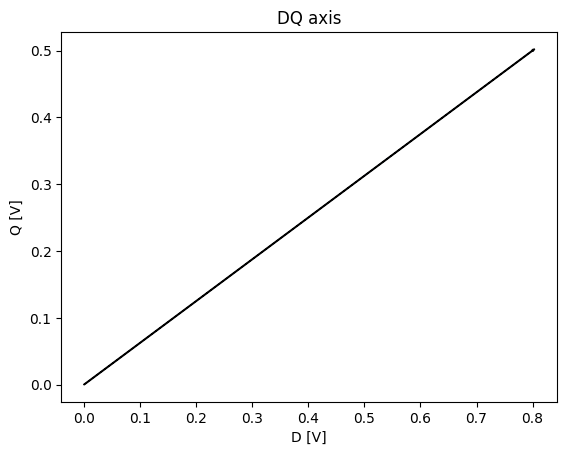

In [14]:
Vd = 0.8
Vq = 0.5
Vo = 0
dq = np.array([[Vd], [Vq], [Vo]])

plt.arrow(0,0,Vd, Vq)
plt.title("DQ axis")
plt.xlabel("D [V]")
plt.ylabel("Q [V]")

In [15]:
alpha_beta_gamma = inv_park(theta, dq)
alpha = [abg[0].item() for abg in alpha_beta_gamma]
beta = [abg[1].item() for abg in alpha_beta_gamma]
gamma = [abg[2].item() for abg in alpha_beta_gamma]

Text(0.5, 1.0, 'Alpha beta gamma axis reference')

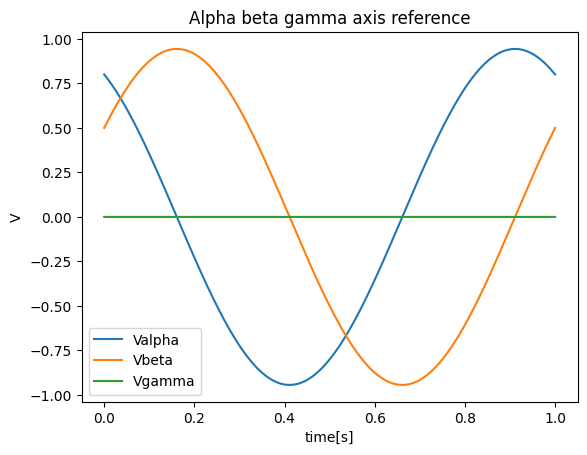

In [16]:
plt.plot(t, alpha,t, beta,t, gamma)
plt.legend(["Valpha","Vbeta","Vgamma"])
plt.xlabel("time[s]")
plt.ylabel("V")
plt.title("Alpha beta gamma axis reference")

In [17]:
uvw = inv_clark(alpha_beta_gamma)
u = [val[0].item() for val in uvw]
v = [val[1].item() for val in uvw]
w = [val[2].item() for val in uvw]

Text(0.5, 1.0, 'UVW')

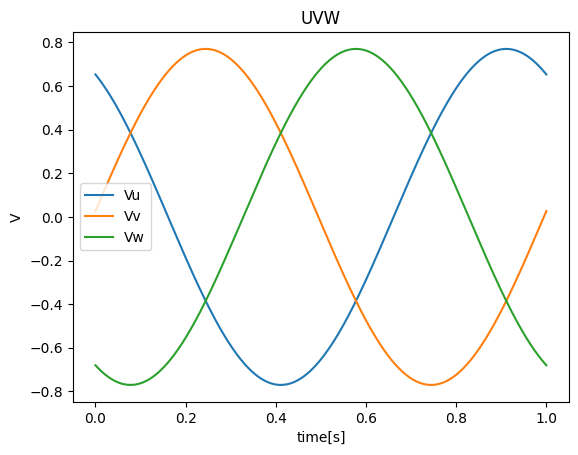

In [18]:
plt.plot(t, u,t, v,t, w)
plt.legend(["Vu","Vv","Vw"])
plt.xlabel("time[s]")
plt.ylabel("V")
plt.title("UVW")

In [19]:
def park_to_uvw(theta,dqo):
    alpha_beta_gamma = inv_park(theta, dqo)
    alpha_beta_gamma = inv_park(theta, dqo)
    uvw = inv_clark(alpha_beta_gamma)
    u = [val[0].item() for val in uvw]
    v = [val[1].item() for val in uvw]
    w = [val[2].item() for val in uvw]
    return u, v, w

Text(0.5, 1.0, 'UVW')

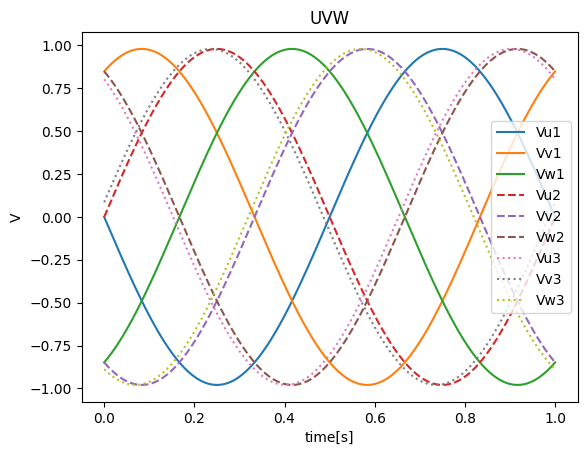

In [20]:
def dqo_generator(angle, magnitude, o = 0):
    angle = np.deg2rad(angle)
    return np.array([[np.cos(angle)*magnitude],[np.sin(angle)*magnitude],[o]])

u1, v1, w1 = park_to_uvw(theta, dqo_generator(90,1.2))
u2, v2, w2 = park_to_uvw(theta, dqo_generator(270,1.2))
u3, v3, w3 = park_to_uvw(theta, dqo_generator(35,1.2))

plt.plot(t, u1,t, v1,t, w1, t, u2, "--",t, v2, "--", t, w2, "--",t, u3, ":",t, v3, ":", t, w3, ":")
plt.legend(["Vu1","Vv1","Vw1","Vu2","Vv2","Vw2","Vu3","Vv3","Vw3"])
plt.xlabel("time[s]")
plt.ylabel("V")
plt.title("UVW")